## Problem 1: Extending the Lady Tasting Tea
**********************************
Let's extend the Lady Tasting Tea experiment as follows. The original experiment has 8 cups: 4 tea-first and 4 milk-first. Suppose we prepare 12 cups: 8 tea-first and 4 milk-first. A participant claims they can tell which was poured first.

Simulate this experiment using numpy by randomly shuffling the cups many times and calculating the probability of the participant correctly identifying all cups by chance. Compare your result with the original 8-cup experiment.

In your notebook, explain your simulation process clearly, report and interpret the estimated probability, and discuss whether, based on this probability, you would consider extending or relaxing the p-value threshold compared to the original design

In [1]:
#Import Libraries
import math
import numpy as np
import random
import matplotlib.pyplot as plt 
import itertools

In [9]:
#Set up the experiment
cups = 12 #12 cups of tea are made
milk_first = 4 #4 of which have the milk added first 

math.comb(cups, milk_first) #math.comb will return the number of ways to choose 4 cups from 12, order does not matter

495

### Combinations 

In the code cell above, `math.comb()` returned the number of ways to choose 4 cups from 12, without being able to choose the same cup twice, order does not matter.
- 495 ways to choose 4 cups from 12, so a 1 in 495 chance she'll randomly choose 4 correct. 


Cups: `1 2 3 4 5 6 7 8 9 10 11 12`

Placeholders: `_ _ _ _`

#### Explanation of `math.comb()`
- In the scenario where order does matter, cups `2`, `4`, `5`, `8`,  is not the same as cups `8`, `4`, `5`, `2`, is not the same as `2`, `5`, `8`, `4` and so on... 
- The number of ways to choose 4 cups in this scenario  ends up being `12*11*10*9`  because when I put a cup in place 1, I have 11 options for place 2. When I put a cup in place 2, I have 10 options for place 3, when I put a cup in place 3, I have 9 options for place 4. 
- But, in this Lady Tasting Tea Experiment, we do not care about the order, so we would take the results of `12*11*10*9` and divide that by the amount of orders the 4 cups can have, which is `4*3*2*1`.
- `12*11*10*9` is actually $12! \div (12-4)!$
- `4*3*2*1` is $4!$
- So, this becomes:

$$
\frac{n!}{k!\times(n-k)!}
$$

In [10]:
# The labels on the cups:
labels = list(range(12))
# The 495 combinations of 4 that exist
combs = list(itertools.combinations(labels, 4))
# The actual combination that contain the milk first 
milk_cups = random.sample(labels, 4)
milk_cups

[1, 11, 9, 3]

In [ ]:
#Get the intersection between the list of 495 combinations and the actual set with milk first 
milk_cups_set = set(milk_cups)
number_overlaps = []

for comb in combs:
    # for each combination in the list - first make it into a set so that the .intersections() function works
    comb_set = set(comb)
    # use intersection() to ascertain which (if any) of the cups in your comb overlap with the set of milk_cups
    overlap = comb_set.intersection(milk_cups_set)
    # How many overlap? 
    number_overlaps.append(len(overlap))
    print(comb_set, len(overlap), overlap)

{0, 1, 2, 3} 3 {0, 1, 3}
{0, 1, 2, 4} 2 {0, 1}
{0, 1, 2, 5} 2 {0, 1}
{0, 1, 2, 6} 2 {0, 1}
{0, 1, 2, 7} 2 {0, 1}
{0, 1, 2, 8} 2 {0, 1}
{0, 1, 2, 9} 3 {0, 9, 1}
{0, 1, 2, 10} 2 {0, 1}
{0, 1, 2, 11} 2 {0, 1}
{0, 1, 3, 4} 3 {0, 1, 3}
{0, 1, 3, 5} 3 {0, 1, 3}
{0, 1, 3, 6} 3 {0, 1, 3}
{0, 1, 3, 7} 3 {0, 1, 3}
{0, 1, 3, 8} 3 {0, 1, 3}
{0, 1, 3, 9} 4 {0, 9, 3, 1}
{0, 1, 10, 3} 3 {0, 1, 3}
{0, 1, 3, 11} 3 {0, 1, 3}
{0, 1, 4, 5} 2 {0, 1}
{0, 1, 4, 6} 2 {0, 1}
{0, 1, 4, 7} 2 {0, 1}
{0, 1, 4, 8} 2 {0, 1}
{0, 1, 4, 9} 3 {0, 9, 1}
{0, 1, 10, 4} 2 {0, 1}
{0, 1, 11, 4} 2 {0, 1}
{0, 1, 5, 6} 2 {0, 1}
{0, 1, 5, 7} 2 {0, 1}
{0, 1, 5, 8} 2 {0, 1}
{0, 1, 5, 9} 3 {0, 9, 1}
{0, 1, 10, 5} 2 {0, 1}
{0, 1, 11, 5} 2 {0, 1}
{0, 1, 6, 7} 2 {0, 1}
{0, 1, 6, 8} 2 {0, 1}
{0, 1, 6, 9} 3 {0, 9, 1}
{0, 1, 10, 6} 2 {0, 1}
{0, 1, 11, 6} 2 {0, 1}
{0, 1, 8, 7} 2 {0, 1}
{0, 1, 9, 7} 3 {0, 9, 1}
{0, 1, 10, 7} 2 {0, 1}
{0, 1, 11, 7} 2 {0, 1}
{0, 1, 8, 9} 3 {0, 9, 1}
{0, 1, 10, 8} 2 {0, 1}
{0, 1, 11, 8} 2 {0, 1}
{0, 1, 10, 9} 

In [6]:
# Now find out in how many of the 495 combinations do the 4 milk cups overlap (obviously only once)
# In how many of the 495 combinations do the 4 milk cups not show up?? 
# How many overlap 1 cup, 2 cups, 3 cups though?

counts = np.unique(number_overlaps, return_counts=True)
counts

(array([0, 1, 2, 3, 4]), array([ 70, 224, 168,  32,   1]))

<BarContainer object of 5 artists>

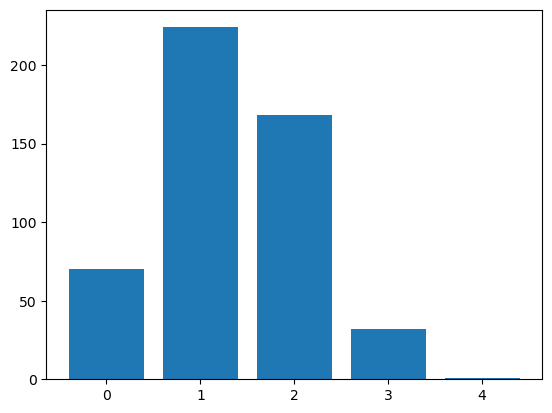

In [7]:
plt.bar(counts[0], counts[1])

In [8]:
#From the above overlaps in the list of 70 possible combinations
p_zero_cups = 70/495
p_one_cup = 224/495
p_two_cups = 168/495 #A little over half that she will pick two correct cups - why? 
p_three_cups = 32/495
p_all_cups = 1/495

p_at_least_three_cups = (1+32)/495
p__at_least_two_cups = (1+32+168)/495
p_at_least_one_cup = (1+32+168+224)/495